# Demo

In [6]:
import os
import matplotlib.pyplot as plt

In [15]:
from pandas import read_csv
# data has a header
# data has separate columns for data and time
df = read_csv('Data/CO-OPS_9413450_wl.csv', header=0, parse_dates=[['Date', 'Time (GMT)']])

In [16]:
print(df)

         Date_Time (GMT)  Predicted (ft) Preliminary (ft)  Verified (ft)
0    2022-03-01 00:00:00          -5.744                -          -5.81
1    2022-03-01 00:06:00          -5.695                -          -5.73
2    2022-03-01 00:12:00          -5.639                -          -5.69
3    2022-03-01 00:18:00          -5.578                -          -5.76
4    2022-03-01 00:24:00          -5.511                -          -5.58
...                  ...             ...              ...            ...
7435 2022-03-31 23:30:00          -4.484                -          -4.33
7436 2022-03-31 23:36:00          -4.509                -          -4.36
7437 2022-03-31 23:42:00          -4.528                -          -4.28
7438 2022-03-31 23:48:00          -4.542                -          -4.29
7439 2022-03-31 23:54:00          -4.549                -          -4.41

[7440 rows x 4 columns]


## Plot the data

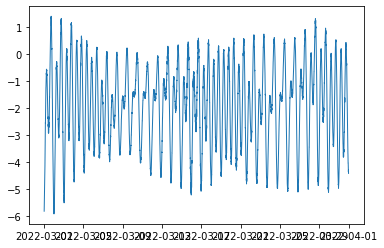

In [20]:
plt.plot(df['Date_Time (GMT)'],df['Verified (ft)'],'-',linewidth=1)
plt.show()

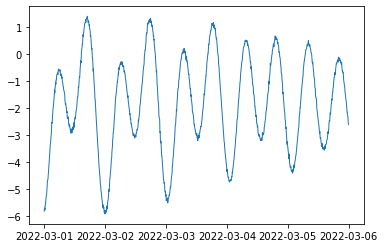

In [85]:
plt.plot(df['Date_Time (GMT)'][:10*24*5],df['Verified (ft)'][:10*24*5],'-',linewidth=1)
plt.show()

## Apply Fourier Transform

In [86]:
import numpy as np
from scipy.fft import rfft, rfftfreq

y = np.abs(rfft(df['Verified (ft)'].values))
N = y.size//2
print(y.shape,y.size,N,df['Verified (ft)'].size)
sample_duration = (df['Date_Time (GMT)'][1]-df['Date_Time (GMT)'][0]).seconds
print(sample_duration)
x = rfftfreq(df['Verified (ft)'].size, sample_duration)

x = x*60*60 # convert to hours

x=x[1:]
y=y[1:]
period = 1/x

y = y/3600
print(len(x),len(y))

(3721,) 3721 1860 7440
360
3720 3720


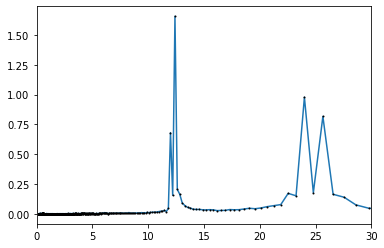

In [87]:
plt.plot(period,y)
plt.plot(period,y,'k.',markersize=2)
plt.gca().set_xlim([0,30])
plt.show()

In [72]:
11//2

5